In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

# Assignment
In this assignment, we'll be working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

### Load the Dataset

In [2]:
#Database Credentials:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# Use the connection to extract SQL data
heartdisease_df = pd.read_sql_query('SELECT * FROM heartdisease', con=engine)

# Close the connection
engine.dispose()

### Pre-Processing

In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

## 1. Apply GMM to the heart disease data by setting `n_components=2`. Get ARI and silhoutte scores for your solution and compare it with those of the k-means and hierarchical clustering solutions that you implemented in the assignments of the previous checkpoints. Which algorithm does perform better?

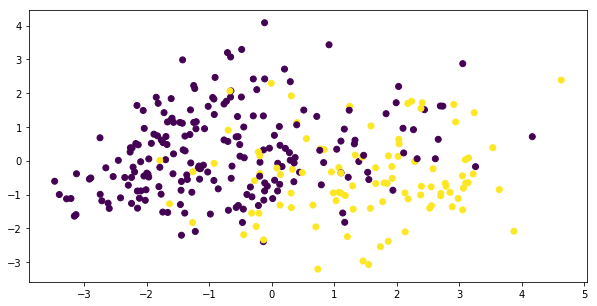

Adjusted Rand Index for GMM:  0.18389186035089963
Silhouette Score for GMM:  0.13628813153331445


In [6]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2, random_state=123)

# Fit model
clusters = gmm_cluster.fit_predict(X_std)

# Visualize clusters
plt.figure(figsize=(10,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.show()

#Print scores
print('Adjusted Rand Index for GMM: ', metrics.adjusted_rand_score(y, clusters))
print('Silhouette Score for GMM: ', metrics.silhouette_score(X_std, clusters, metric='euclidean'))

Both the ARI and Silhouette Score are lower that those obtained using the algorithms in previous checkpoints. K-Means achieved a 43.7% ARI, and Hierarchical Clustering achieved 23.3% Silhouette Score, so those are better algorithms, respectively, for this case.

## 2. GMM implementation of scikit-learn has a parameter called `covariance_type`. This parameter determines the type of covariance parameters to use. Specifically, there are four types you can specify:

1. full: This is the default. Each component has its own general covariance matrix.
2. tied: All components share the same general covariance matrix.
3. diag: Each component has its own diagonal covariance matrix.
4. spherical: Each component has its own single variance.

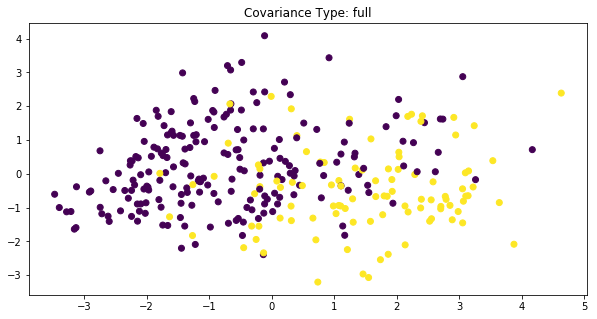

Adjusted Rand Index for GMM (Covariance Type = full): 0.18389186035089963
Silhouette Score for GMM (Covariance Type = full): 0.13628813153331445

-----------------------------------------------------------------------------------------



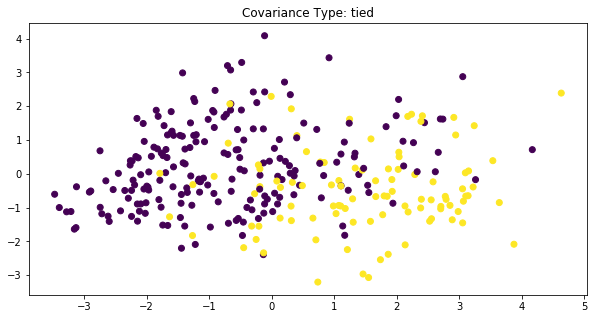

Adjusted Rand Index for GMM (Covariance Type = tied): 0.18389186035089963
Silhouette Score for GMM (Covariance Type = tied): 0.13628813153331445

-----------------------------------------------------------------------------------------



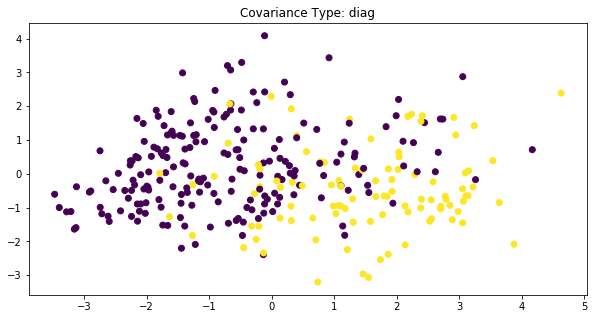

Adjusted Rand Index for GMM (Covariance Type = diag): 0.18389186035089963
Silhouette Score for GMM (Covariance Type = diag): 0.13628813153331445

-----------------------------------------------------------------------------------------



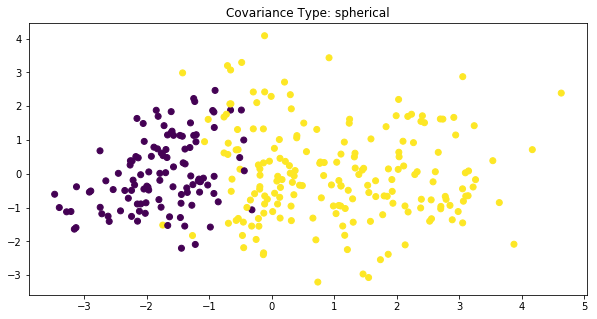

Adjusted Rand Index for GMM (Covariance Type = spherical): 0.20765243525722465
Silhouette Score for GMM (Covariance Type = spherical): 0.12468753110276876

-----------------------------------------------------------------------------------------



In [9]:
for cov in ['full', 'tied', 'diag', 'spherical']:
    # Defining the agglomerative clustering
    gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type = cov)

    # Fit model
    clusters = gmm_cluster.fit_predict(X_std)

    # Visualize clusters
    plt.figure(figsize=(10,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
    plt.title('Covariance Type: ' + cov)
    plt.show()

    #Print scores
    print('Adjusted Rand Index for GMM (Covariance Type = {}): {}'.format(cov, metrics.adjusted_rand_score(y, clusters)))
    print('Silhouette Score for GMM (Covariance Type = {}): {}'.format(cov, metrics.silhouette_score(X_std, clusters, metric='euclidean')))
    print('\n-----------------------------------------------------------------------------------------\n')

The ARI and Silhouette Score of `full`, `diag`, and `tied` are equal. `spherical` has a higher ARI than the other three covariance types, and a lower Silhouette Score. 